In [2]:
import numpy as np
import pandas as pd 

from sklearn.cluster import KMeans
from sklearn import metrics

import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


C:\Users\THANH LUAN\AppData\Local\Temp\ipykernel_13988\1748012561.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins=20)
C:\Users\THANH LUAN\AppData\Local\Temp\ipykernel_13988\1748012561.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins=20)
C:\Users\THANH LUAN\AppD

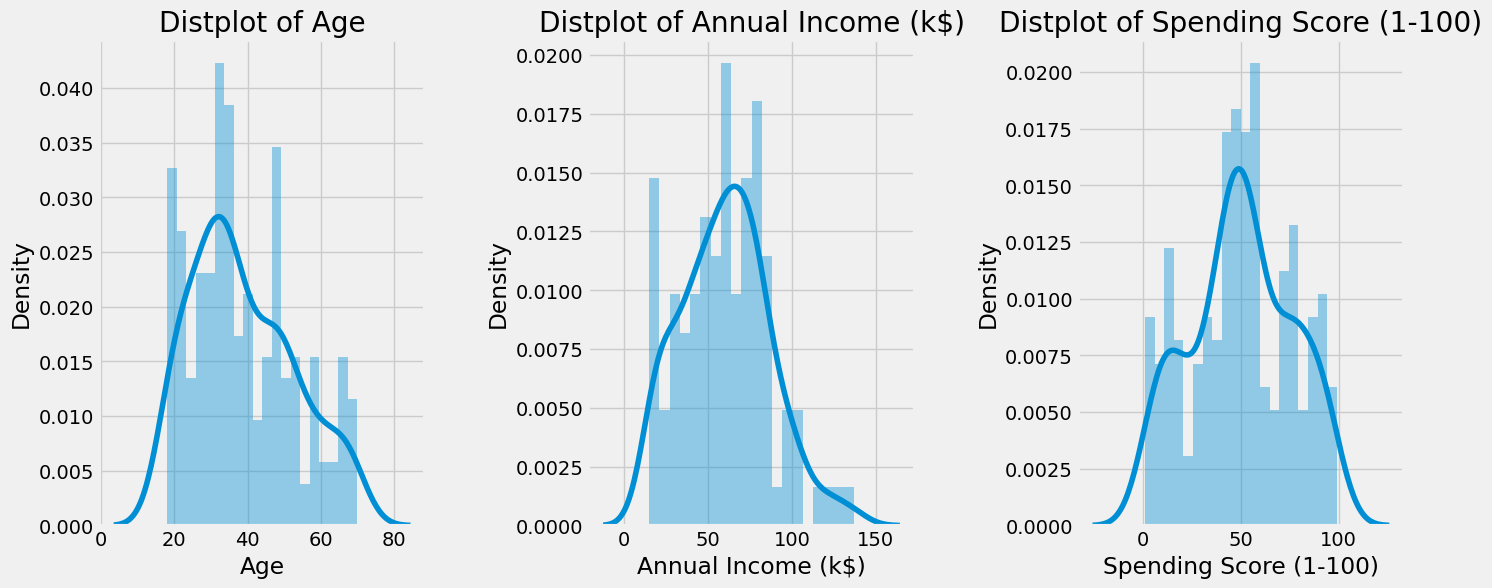

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(data[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show();


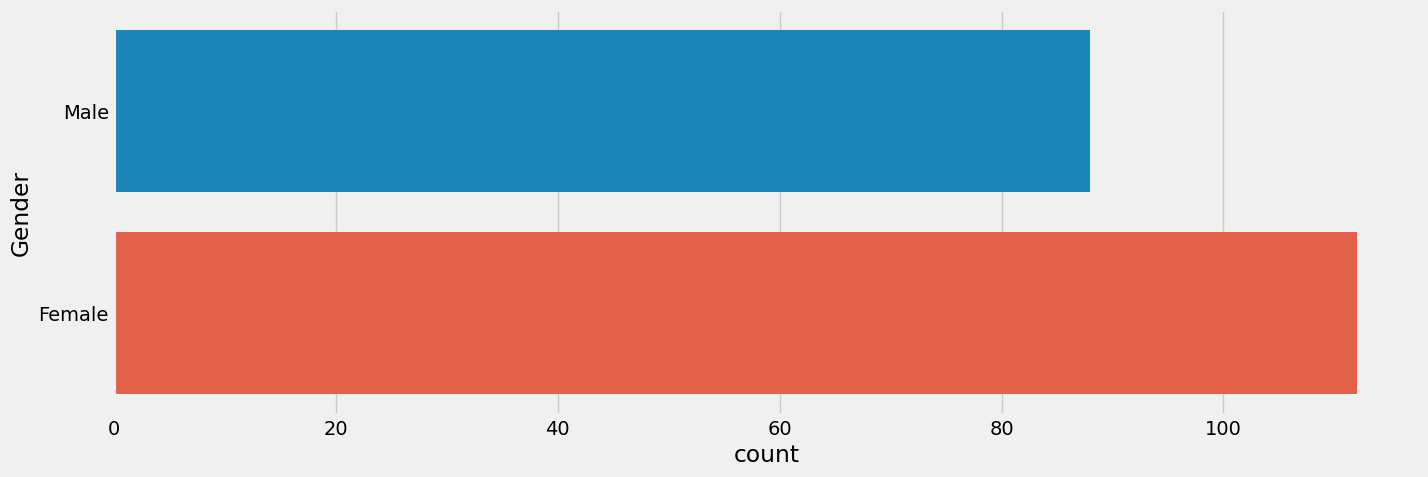

In [8]:
plt.figure(1, figsize=(15,5))
sns.countplot(y='Gender', data=data)
plt.show()

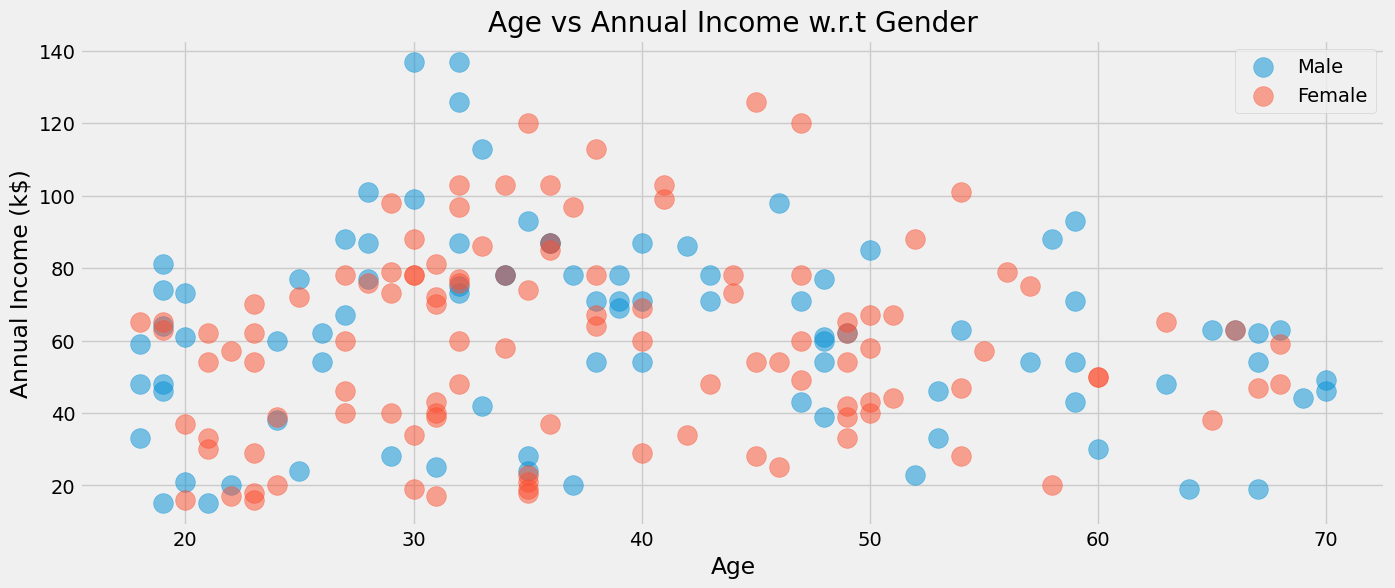

In [13]:
plt.figure(1, figsize=(15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x= 'Age',y= 'Annual Income (k$)', data=data[data['Gender'] == gender],
                s=200, alpha=0.5)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend(['Male', 'Female'])
plt.show()

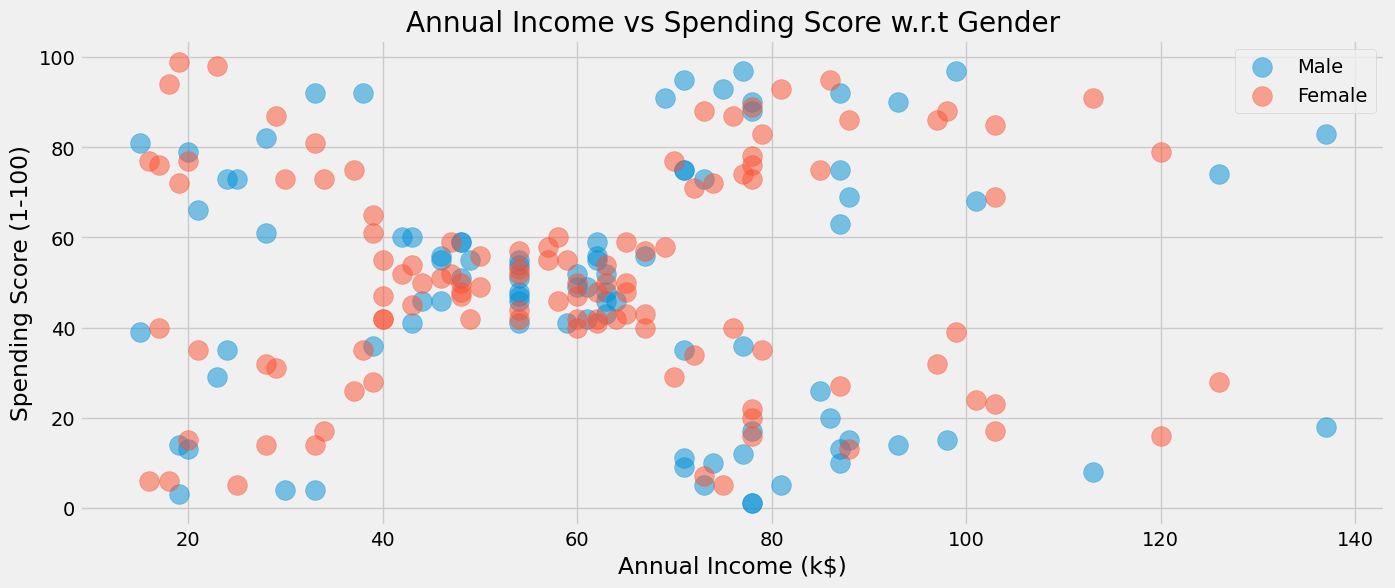

In [14]:
plt.figure(1, figsize=(15,6))
for gender in ['Male', 'Female']:
    plt.scatter(x= 'Annual Income (k$)',y= 'Spending Score (1-100)', data=data[data['Gender'] == gender],
                s=200, alpha=0.5)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend(['Male', 'Female'])
plt.show()

In [25]:
X1 = data[['Age', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = KMeans(n_clusters=n,init='random')
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

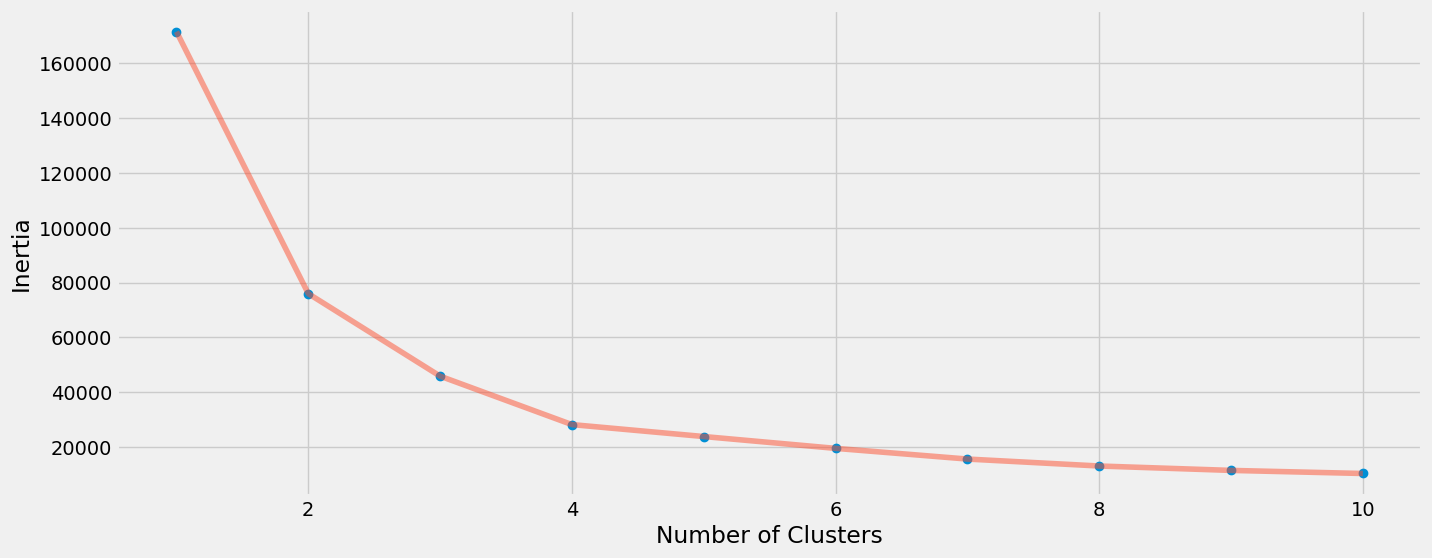

In [26]:
plt.figure(1, figsize=(15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [27]:
algorithm = KMeans(n_clusters=4, init='random')
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


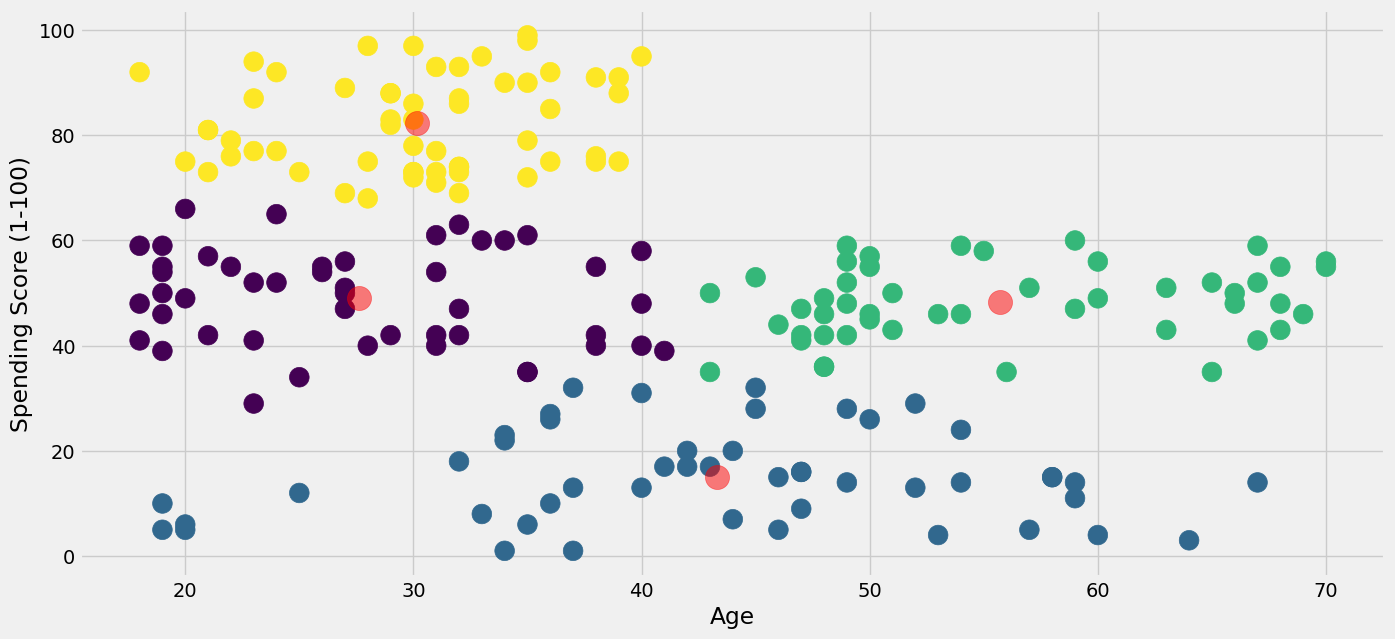

In [28]:
plt.figure(1, figsize=(15,7))
plt.clf()
plt.scatter(x= 'Age',y= 'Spending Score (1-100)', data=data, c = labels1, s=200)
plt.scatter(x= centroids1[:,0],y= centroids1[:,1], c = 'red', s=300, alpha=0.5)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)')
plt.show()

In [29]:
metrics.silhouette_score(X1, labels1, metric='euclidean')

0.49973941540141753

In [30]:
X2 = data[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = KMeans(n_clusters=n,init='random')
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

In [64]:
algorithm = KMeans(n_clusters=4, init='random')
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [65]:
X3 = data[['Age','Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range(1,11):
    algorithm = KMeans(n_clusters=n,init='random')
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)
# X3

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

In [67]:
algorithm = KMeans(n_clusters=4, init='random')
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

c:\Users\THANH LUAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [41]:
metrics.silhouette_score(X2, labels1, metric='euclidean')

0.08901800691337511

In [42]:
metrics.silhouette_score(X3, labels1, metric='euclidean')

0.24603543128009828

In [75]:
data['label3'] = labels3
trace1 = go.Scatter3d(
    x=data['Age'],
    y=data['Spending Score (1-100)'],
    z=data['Annual Income (k$)'],
    mode='markers',
    marker=dict(color = data['label3'], size=20, line = dict(color = data['label3'],width = 12),opacity=0.8))
dat = [trace1]
layout = go.Layout(
    title = 'Clusters',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)
fig = go.Figure(data=dat, layout=layout)
fig
# py.offline.iplot(fig)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': array([3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
                                         1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
                                         1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1,
                                         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                         1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
                                         0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
                                         0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
                                         0, 2, 0, 2, 0, 2, 0, 2]),
                         'line': {'color': array([3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
                                                  1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1,
                                                  1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1,
                                                  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                                                  1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
                                                  0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
                                                  0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
                                                  0, 2, 0, 2, 0, 2, 0, 2]),
                                  'width': 12},
                         'opacity': 0.8,
                         'size': 20},
              'mode': 'markers',
              'type': 'scatter3d',
              'x': array([19, 21, 20, 23, 31, 22, 35, 23, 64, 30, 67, 35, 58, 24, 37, 22, 35, 20,
                          52, 35, 35, 25, 46, 31, 54, 29, 45, 35, 40, 23, 60, 21, 53, 18, 49, 21,
                          42, 30, 36, 20, 65, 24, 48, 31, 49, 24, 50, 27, 29, 31, 49, 33, 31, 59,
                          50, 47, 51, 69, 27, 53, 70, 19, 67, 54, 63, 18, 43, 68, 19, 32, 70, 47,
                          60, 60, 59, 26, 45, 40, 23, 49, 57, 38, 67, 46, 21, 48, 55, 22, 34, 50,
                          68, 18, 48, 40, 32, 24, 47, 27, 48, 20, 23, 49, 67, 26, 49, 21, 66, 54,
                          68, 66, 65, 19, 38, 19, 18, 19, 63, 49, 51, 50, 27, 38, 40, 39, 23, 31,
                          43, 40, 59, 38, 47, 39, 25, 31, 20, 29, 44, 32, 19, 35, 57, 32, 28, 32,
                          25, 28, 48, 32, 34, 34, 43, 39, 44, 38, 47, 27, 37, 30, 34, 30, 56, 29,
                          19, 31, 50, 36, 42, 33, 36, 32, 40, 28, 36, 36, 52, 30, 58, 27, 59, 35,
                          37, 32, 46, 29, 41, 30, 54, 28, 41, 36, 34, 32, 33, 38, 47, 35, 45, 32,
                          32, 30], dtype=int64),
              'y': array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35, 66,
                          29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92, 14, 81,
                          17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52, 60, 54, 60,
                          45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48, 59, 47, 55, 42,
                          49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46,
                          55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46,
                          43, 48, 52, 54, 42, 46, 48, 50, 